In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_yds_salary_18-19')

In [3]:
tes.dtypes

NAME         object
YDS           int64
YDS_rank    float64
salary        int64
dtype: object

In [4]:
tes.head()

,NAME,YDS,YDS_rank,salary
0,Travis Kelce,1336,2.0,9368400
1,Zach Ertz,1163,3.0,8500000
2,Jared Cook,896,4.0,5300000
3,Eric Ebron,750,5.0,6500000
4,Rob Gronkowski,682,6.0,9000000


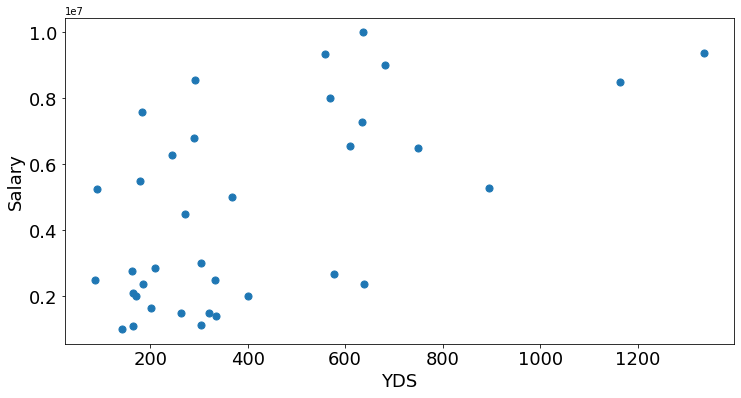

In [5]:
ax = tes.plot(kind="scatter", x = 'YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 2.46716228e-17, -7.70988212e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.60286456, -0.92219854],
       [ 0.77874876,  1.21860613],
       [-0.58450722,  0.55150751],
       [ 2.90511462,  1.50958321],
       [ 1.02014003, -0.40209761]])

In [11]:
km.predict(X)

array([3, 3, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,YDS,YDS_rank,salary,clusters
0,Travis Kelce,1336,2.0,9368400,3
1,Zach Ertz,1163,3.0,8500000,3
2,Jared Cook,896,4.0,5300000,4
3,Eric Ebron,750,5.0,6500000,1
4,Rob Gronkowski,682,6.0,9000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.34312500e+02, 1.96254325e+06],
       [6.34142857e+02, 8.10000000e+06],
       [2.39625000e+02, 6.18750000e+06],
       [1.24950000e+03, 8.93420000e+06],
       [7.04000000e+02, 3.45361667e+06]])

In [14]:
tes.groupby('clusters')[['YDS', 'salary']].mean()

,YDS,salary
clusters,,
0,234.312500,1.962543e+06
1,634.142857,8.100000e+06
2,239.625000,6.187500e+06
3,1249.500000,8.934200e+06
4,704.000000,3.453617e+06


In [15]:
centroids = tes.groupby('clusters')[['YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

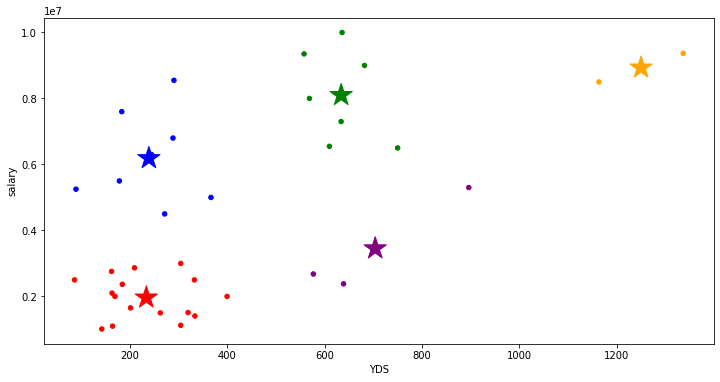

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'YDS', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

7.726870181811112

In [18]:
silhouette_score(X, km.labels_)

0.5457320943098043